In [1]:
import numpy as np

In [4]:
a = np.array([6,7,6,4,5,6,8])
b = np.array([6.4,7.1,5.9,4.2,5.2,6.2,7.5])
print(sum((a-b)**2))

0.5500000000000004


In [8]:
import math
print(round(1/(1+math.exp(-2*(0.1+0.3+0.6))),2))

0.88


In [12]:
from sympy import symbols, cos, diff

a, b, x = symbols('a b x', real=True)
f = 2*a*x + b**2

print(diff(f, a))

2*x


In [15]:
from sympy import *
 
x, y = symbols('x, y')
eq1 = Eq(8*x-6*y-34)
eq2 = Eq(-6*x+10*y+42)
 
sol = solve([eq1, eq2], [x, y])
sol

C:\Users\askar\AppData\Local\Temp\ipykernel_14780\2200345287.py:4: SymPyDeprecationWarning: 

Eq(expr) with a single argument with the right-hand side
defaulting to 0 is deprecated. Use Eq(expr, 0) instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-eq-expr
for details.

This has been deprecated since SymPy version 1.5. It
will be removed in a future version of SymPy.

  eq1 = Eq(8*x-6*y-34)


{x: 2, y: -3}

In [21]:
import numpy as np
r = np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2, axis=0)
r

TypeError: 'Symbol' object is not subscriptable

In [22]:
import numpy as np
 
def func_rosen(x):
    r = np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2, axis=0)
    return r

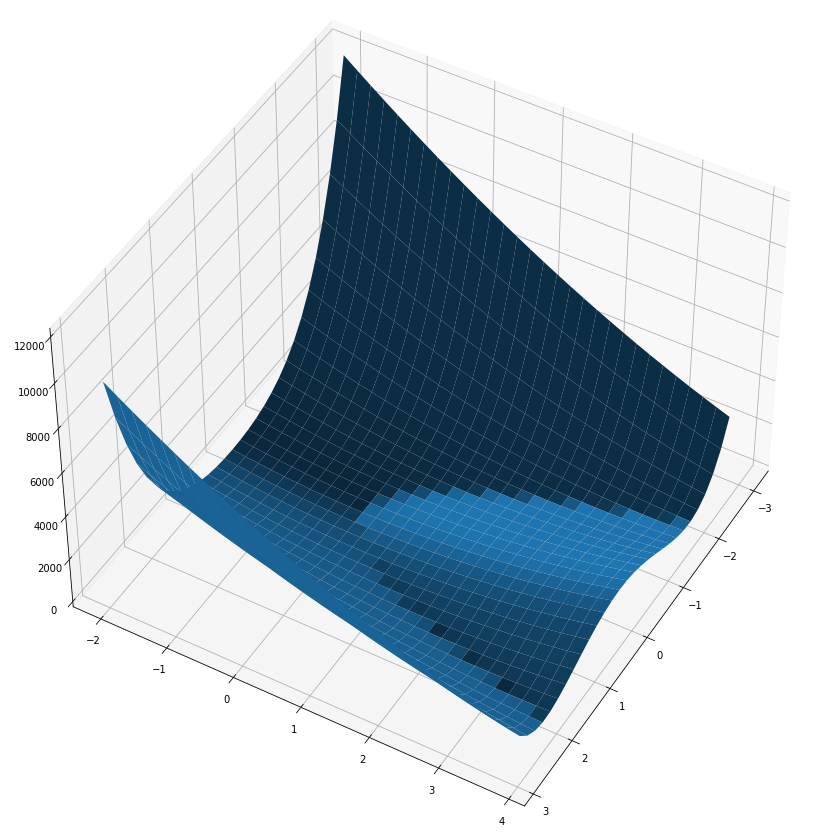

In [40]:
import matplotlib.pyplot as plt
graph = plt.figure(figsize=[25, 15])
ax = graph.add_subplot(projection='3d')
ax.view_init(45, 30)
x1 = np.arange(-3, 3, 0.2)
x2 = np.arange(-2, 4, 0.2)
x1, x2 = np.meshgrid(x1, x2)
y = func_rosen(np.array([x1,x2]))
surf = ax.plot_surface(x1, x2, y)
plt.show()

In [41]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='powell')
print(result_point.x)

[1. 1. 1. 1. 1.]


In [42]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='nelder-mead')
print(result_point.x)

[1.02760651 1.05589639 1.11509457 1.2440091  1.54862169]


In [47]:
from scipy.optimize import least_squares
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
res = least_squares(func_rosen, x1)
print(res.x)

[0.93865173 0.88210868 0.776457   0.60278764 0.36076162]


In [55]:
from sympy import *
x,y,w=symbols(' x y w' )
g = ((x-2)**2+(y-1)**2)**(0.5)
q = x + y - 1
f = ((x-2)**2+(y-1)**2)**(0.5) + w*(x + y - 1)
fx = f.diff(x)
fy = f.diff(y)
fw = f.diff(w)
sols = solve([fx,fy,fw],x,y,w)
print(sols[0])

(1.00000000000000, 0.0, 0.707106781186548)


In [56]:
from sympy import *

a,b,c,w=symbols('a b c w')
g = 2*(a*b + a*c + b*c)

L = 2*a*b + 2*a*c + 2*b*c + w*(a*b*c - 1)

L_a = L.diff(a)
L_b = L.diff(b)
L_c = L.diff(c)
L_w = L.diff(w)

print(solve([L_a, L_b, L_c, L_w], a, b, c, w)[0])

(1, 1, 1, -4)


In [54]:
from sympy import *
a,b,c,x,y,w=symbols('a b c x y w' )
fa = -x+a+b
fb=-y+a
fc=2*b*c
fx=x+y-10
fy = -x + 6 + c
sols = solve([fa,fb,fc,fx,fy],a,b,c,x,y,w)
print(sols[0])

(4, 2, 0, 6, 4, w)


In [57]:
import numpy as np

In [61]:
f = np.array([8, 2, 8, 3, 5, 6, 5, 15], dtype=np.float)
 
np.gradient(f)

C:\Users\askar\AppData\Local\Temp\ipykernel_14780\2440505453.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  f = np.array([8, 2, 8, 3, 5, 6, 5, 15], dtype=np.float)


array([-6. ,  0. ,  0.5, -1.5,  1.5,  0. ,  4.5, 10. ])

In [65]:
def fun(x, y, a=1, b=1):
    return a * (x ** 2) + b * (y ** 2)

In [66]:
def grad(x, y, a=1, b=1):
    return np.array([2 * a * x, 2 * b * y])

In [67]:
def grad_descend(grad, step_size=0.2, num_steps=30):
    lst = []
    x = np.random.uniform(0, 3, size = 2)
    lst.append(x)
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)
    return np.array(lst)

In [68]:
def plot_grad(fun, trace):
    fig = plt.figure(figsize=(10, 8))
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.6)
    ax.contour(x, y, z, zdir='z', offset=z.min())
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())

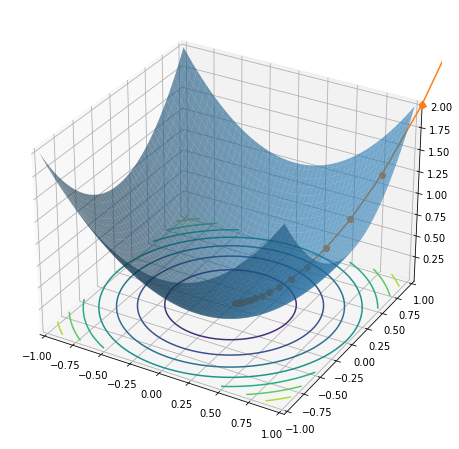

In [69]:
trace = grad_descend(grad, 0.1, 20)
plot_grad(fun, trace = trace)